### <strong>[1주차 - Day3] 파이썬을 무기로, 코딩테스트 광탈을 면하자! (1)<strong>
* RGB색상표 참고: https://ingu627.github.io/md/markdown_grammar/

### Step 1-1:해시(Hash)  대표 문제 풀이: 완주하지 못한 선수

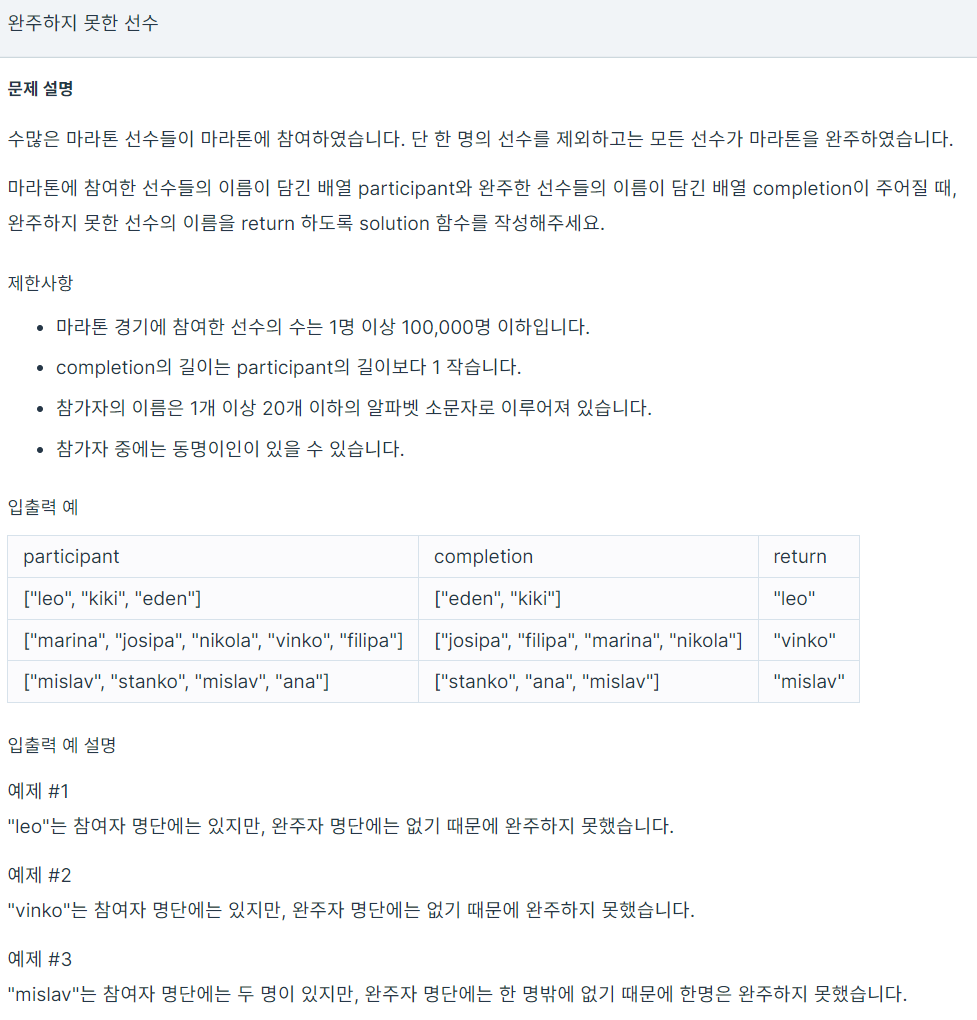

* #### 자료구조(알고리즘)의 선택?
    * 만약 이름 대신 번호가 주어졌다면?
    * -> 선형 배열(linear array)

    * 번호 말고 다른것(예:문자열)로 접근할 수 있는 좋은 자료 구조는 없나요?

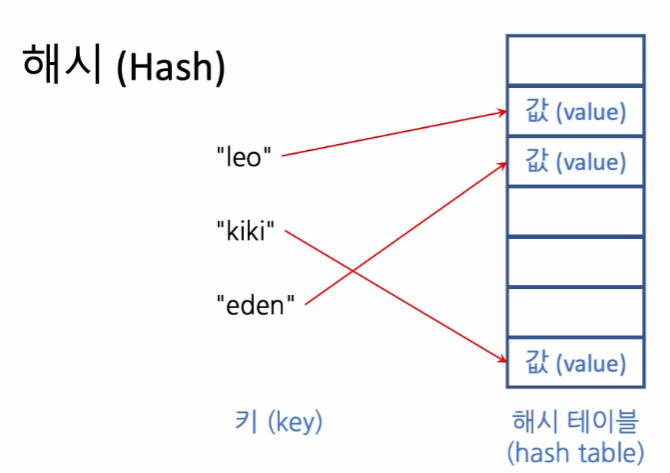

* 해시 테이블에 문자열로 이루어진 사람들의 이름과 그 이름이 participant의 등장한
횟수를 세어서 해시 테이블에 기록하고
* complition이라는 배열을 보면서 각 이름의 선수들중에 완료한 선수들이 있으면 기존 해시 테이블에서 해당 키에 해당하는 값을 줄여가면서 마지막에 1이 하나만 남을 것인대 
그 하나를 리턴하도록 코드를 작성하면 된다

### Step 1-2: Python 풀이 예제 보기

* #### python 사전(dictionary)
    * d = {"leo":30, "kiki":62, "eden":5}
    * x = d["leo"]
    * d["leo"] = 58
    * 파이썬 사전은 내부적으로 해시를 통해 구현된다!!!

    * <span style="color:yellow">사전의 원소들을 해시를 이용해 O(1) 시간에 접근가능</span>

In [1]:
def solution(participant, completion):
    d = {}
    # 이 반복문의 복잡도는 participant 배열의 길이에 비례한다
    for x in participant:
        d[x] = d.get(x, 0) + 1
    # 마찬가지로 이 반복문의 복잡도 역시 completion 배열의 길이에 비례한다
    for x in completion:
        d[x] -= 1
    # 이 리스트 컴프리헨션 역시 participant 원소의 길이에 비례한다
    dnf = [k for k,v in d.items() if v > 0]
    return dnf[0]
    # 결국 이 함수의 시간복잡도는 partipant배열의 길이에 비례하게 된다.

* #### 정렬을 이용한다면?


* O(nlogn) 이 코드는 테스트는 통과하지만 효율적이지 않다.

In [5]:
def solution(participant, completion):

    # 이 정렬은 nlogn의 비례하는 복잡도를 가진다.
    # 따라서 위의 코드보다는 효율적이지 않은 코드이다
    participant.sort()

    completion.sort()

    for i in range(len(completion)):
        if participant[i] != completion[i]:
            return participant[i]
    return participant[len[participant]-1]


In [6]:
participant = 	["leo", "kiki", "eden"]
completion = ["eden", "kiki"]
participant.sort()
completion.sort()
print(participant)
print(completion)

['eden', 'kiki', 'leo']
['eden', 'kiki']


### Step 2-1: 탐욕법(Greedy) 대표 문제 풀이: 체육복
* https://school.programmers.co.kr/learn/courses/30/lessons/42862

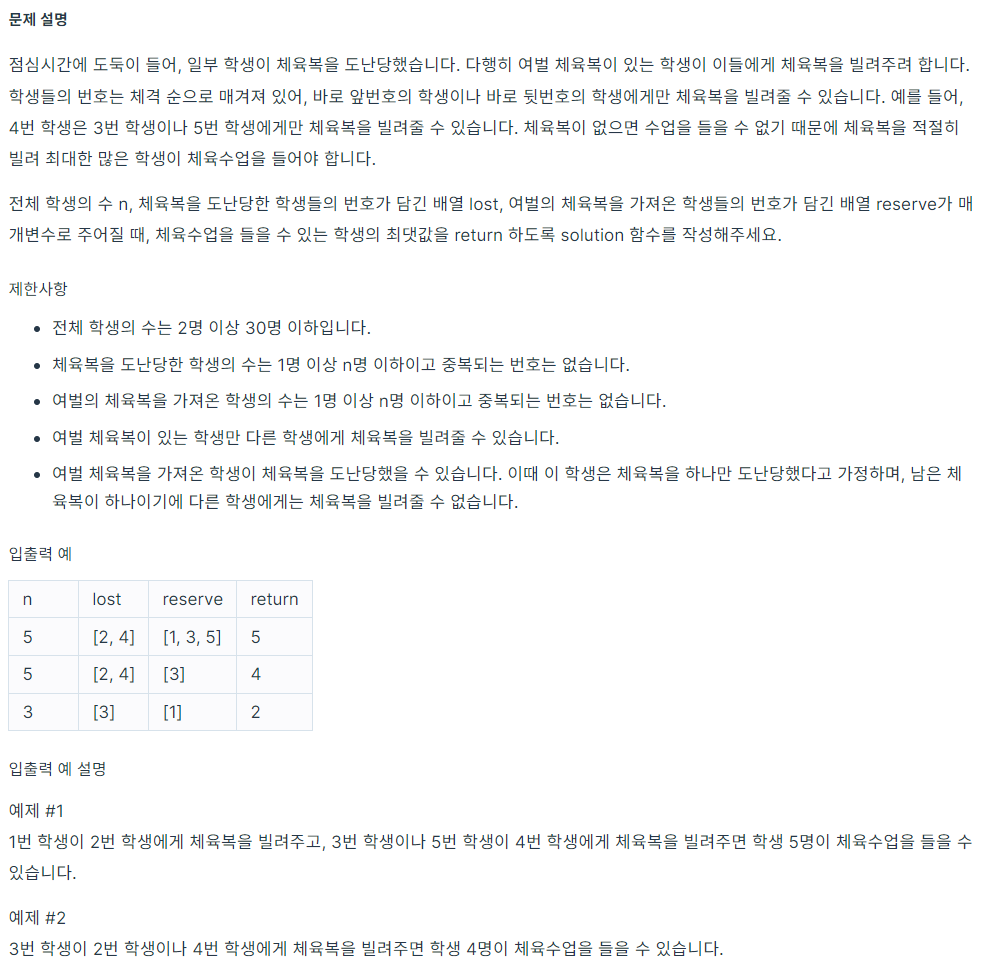

* #### 문제의 해결 - 예제

* 이렇게 지금 생각으로는 2가지의 방법으로 체육복을 빌려주는 것을 생각 해 볼 수있다

* 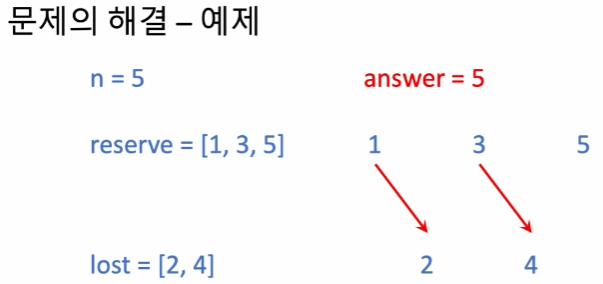

* 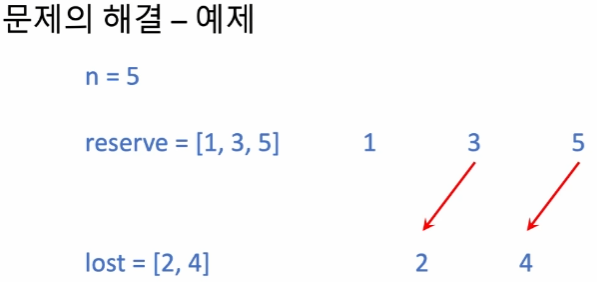


* #### 탐욕법(Greedy Algorithm)

* 알고리즘의 각 단계에서 그 순간에 최적이라고 생각되는 것을 선택

* (탐욕법으로 최적해를 찾을 수 있는 문제) -> 현재의 선택이 마지막 해답의 최적성을 해치지 않을 때

* => 지금 좋은 답이 최종적으로도 좋다는 것이다

* #### 탐욕법 적용 가능성 확인

* 큰 번호로 빌려줄려고 하면 마지막 6번학생은 체육복이 있음에도 빌려줄 수없다. => 이런경우 최적이 아님

* 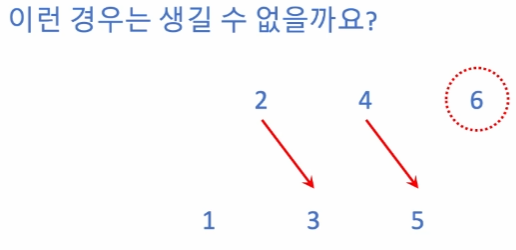

* <span style="color:Aqua">빌려줄 학생들을 <strong>"정해진 순서"<strong>로 살펴야 하고, 이 <strong>"정해진 순서"<strong>에 따라 우선하여 빌려줄 방향을 정해야 함</span>


* #### 문제의 해결 - 방법(1)

* <span style="color:red"> 착안점: 학생의 수는 기껏해야 30!<span>

* 학생 수만큼 배열을 확보하고, 여기에 각자가 가지도 있는 체육복의 수를 기록한다

* -> 번호 순서대로 "스캔"하면서 빌려줄 관계를 정한다

* 다음 예시를 보면 10명의 학생 일단 체육복이 모두 존재하므로 전부 1이라는 값을 매핑한후 코딩의 편의성을 위해 양쪽에 허깨비 값, 양쪽 끝을 의미하는 1씩을 추가한다

* 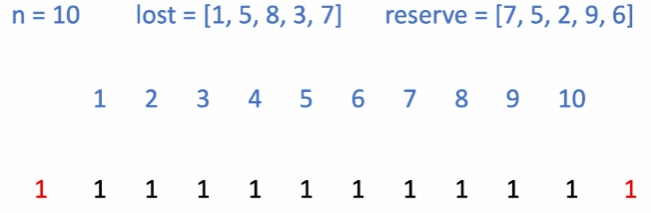

* 체육복을 하나 더 가져온 학생들의 값을 1씩 증가시킨다

* 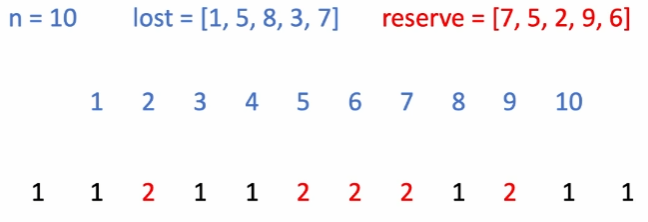

* 그리고 체육복을 잃어버린 학생들의 값을 1씩 감소시킨다

* 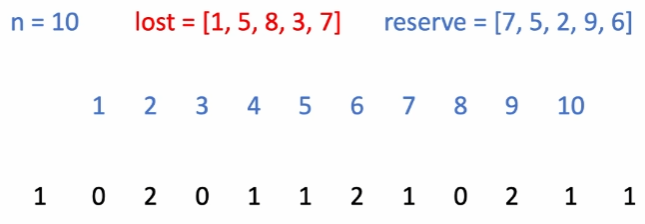

* 1번부터 10번까지 이동하며 자기 주위의 학생에게 체육복을 빌려줄 수 있나 확인하고 있다면 왼쪽 부터 먼저 빌려주는 방식으로 쭉 진행한다.

* 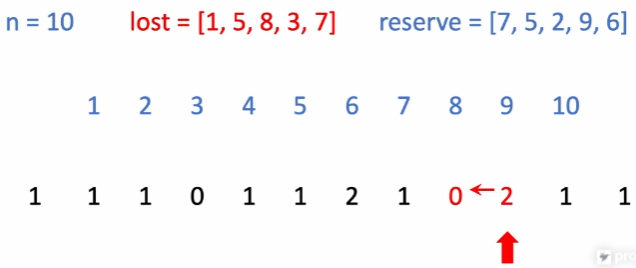

* #### 알고리즘의 복잡도

* 여벌을 가져온 학생 처리: reserve의 길이에 비례
* 체육복을 잃어버린 학생 처리: lost의 길이에 비례
* 체육복 빌려주기 처리: 전체 학생수(n)에 비례
* -> <span style="color:red"> O(n) </span>

* #### 문제의 해결 - 방법(2)

* <span style="color:red"> 만약 전체 학생 수가 매우 크다면? </span>
    - 하지만 문제의 성질상 O(n)보다 낮은 복잡도 알고리즘은 어려울 듯?  

    - 이렇다면 여벌의 체육복을 가져온 학생들의 번호(reserve)를 <span style="color:red">정렬</span>하고, (여벌의 체육복을 가져온 학생수가 k라고 하면 이 정렬의 복잡도는 O(klogk))
    - 이것을 하나 하나 순서대로 살펴보면서 빌려줄 수 있는 다른 학생을 찾아서 처리한다!(이 방법은 해시를 적용해서 상수 시간에 처리 할 수있다!) -> 즉 여벌의 체육복을 가져온 학생들과 그 주위 학생들만 살펴보는 것이다!

    <br>
*  <span style="color:red"> 그런데 여벌의 체육복을 가져온 학생은 매우 적다면? </span>
    - 비효율적인 메모리공간 차지와 실행시간이 매우 오래 걸릴것이다. 전체 학생까지 다 보면서 살펴봐야 하므로

* 실제 적용 방법을 살펴보도록 하자

* 일단 여벌의 체육복을 가져온 인원을 정렬한후 가져온 인원과 잃어버린 인원중 같은 사람이 있는지 확인한다.
같다면 여벌이 있지만 잃어버린경우 이므로 결국 체육복 1개를 가져온것과 같아 의미가 없으므로 양쪽에서 모두 제외한다.
* 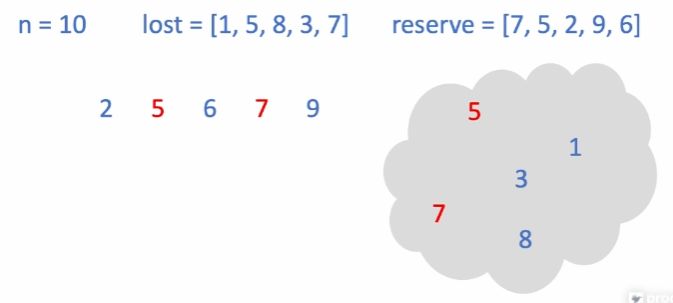

* 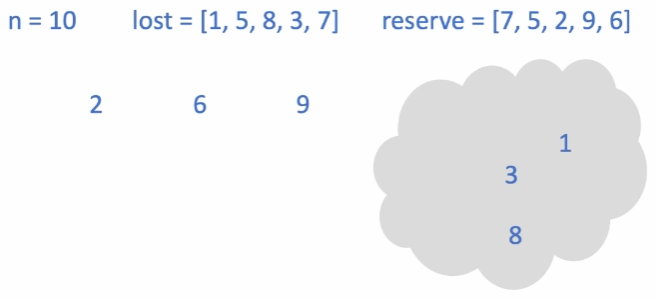

* 이제 2번 부터 비교하면서 2번 왼쪽과 오른쪽의 값이 저 구름안에 있는 지를 확인한다. 
2번 왼쪽인 1번이 구름안에 있으므로 2번은 1번에게 체육복을 빌려준다. 이 방법을 여벌이 체육복이 있는 인원의 끝까지 수행한다.

* 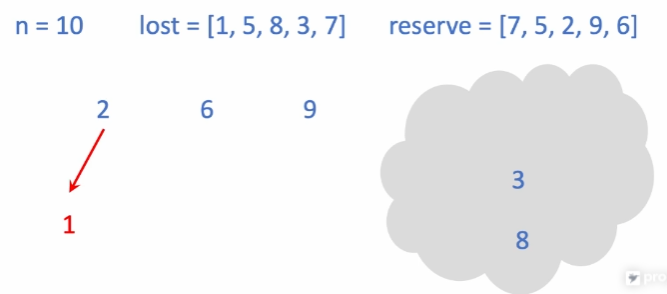

* 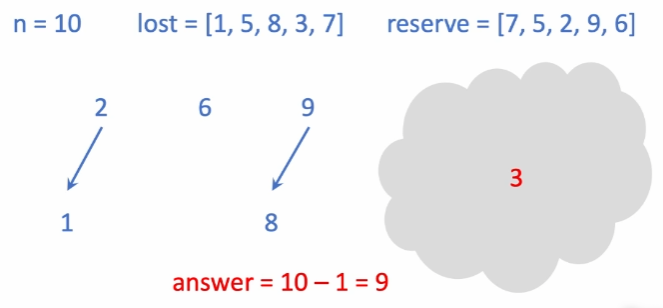

* #### 알고리즘의 복잡도
    * 여벌의 체육복을 가져온 학생들의 번호를 정렬
    * -> O(klogk)

    * 체육복을 빌려줄 수 있는 학생을 찾아 처리
    * -> O(k) * O(1)(이 작업은 여벌의 체육복 양옆 2명을 판단하는 과정이며 이 작업을 
    상수시간에 해시를 통해서 할 수있다)

    * 전체 알고리즘의 시간 복잡도 -> <span style="color:red">O(klogk)</span>

    * 이 알고리즘을 적용하기 좋은 경우는 보통은 문제의 해결 - 방법(1)이 좋겠지만 n이 큰값을 가지며 k가 작은 값을 가질때 1번 방법보다 더 효율적으로 빠르게 동작 할 수있을 것이다!

### Step 2-2: Python 풀이 예제 보기

In [2]:
def solution(n, lost, reserve):
    # 1번보다 앞에 하나 n번 보다 뒤에하나 허깨비들을 세운다고 했으므로 배열을 이렇게 초기화
    # 이렇게 구성하면 바운더리를 체크하지 않을 수 있다. 그리고 i가 0부터 하게되면 i-1 = -1이되어
    # 끝원소부터 시작할 수있는대 이 경우를 방지 할 수 있다.
    u = [1] * (n+2)
    #해당 반복문의 복잡도는 O(n)
    for i in reserve:
        u[i] += 1
    #해당 반복문의 복잡도는 O(n)
    for i in lost:
        u[i] -= 1
    #해당 반복문의 복잡도는 O(n)
    for i in range(1,n+1):
        if u[i - 1] == 0 and u[i] == 2:
            u[i -1: i+1 ] = [1, 1]
        elif u[i] == 2 and u[i + 1] == 0:
            u[i:i+2] = [1, 1]

    return len([x for x in u[1:-1] if x >0 ])


    


In [ ]:
# n이 굉장히 크면서 여벌의 체육복을 가져온 사람이 적은 경우 해당 코드가 위 코드 보다 효율적이다!

def solution(n, lost, reserve):
    # set 자료형도 해시 테이블로 구현되어 있음
    # &는 교집합을 말한다! 교집합을 만들어 s에 담는 것이다
    s = set(lost) & set(reserve) 

    # 그럼 l에는 체육복을 도난 당한 학생인대 reserve에도 포함이 되서 이 학생들은 체육복이 하나 남았으니까 
    # 빌릴 필요가 없는 학생들이다.
    l = set(lost) - s 

    # 여벌의 체육복은 가져왔지만 도난은 당하지 않아 빌려 줄 수있는 학생들이다.
    r = set(reserve) - s

    for x in sorted(r):
        # 나보다 왼쪽 학생을 먼저 살펴보고 
        if x - 1 in l:
            l.remove(x -1)
        # 그 이후에 오른쪽 학생(더 큰 번호를 가진 학생)을 살펴보고 
        elif x + 1 in l:
            l.remove(x + 1)

    # 전체 학생에서 결국 체육복이 없는 사람을 뺸다
    return n - len(l)

    # 전체 알고리즘의 복잡도는 sorted(r)에 비례하는 O(klogk)에 비례한다


### Step 3-1: 정렬(Sort) 대표 문제 풀이: 가장 큰 수

https://school.programmers.co.kr/learn/courses/30/lessons/42746

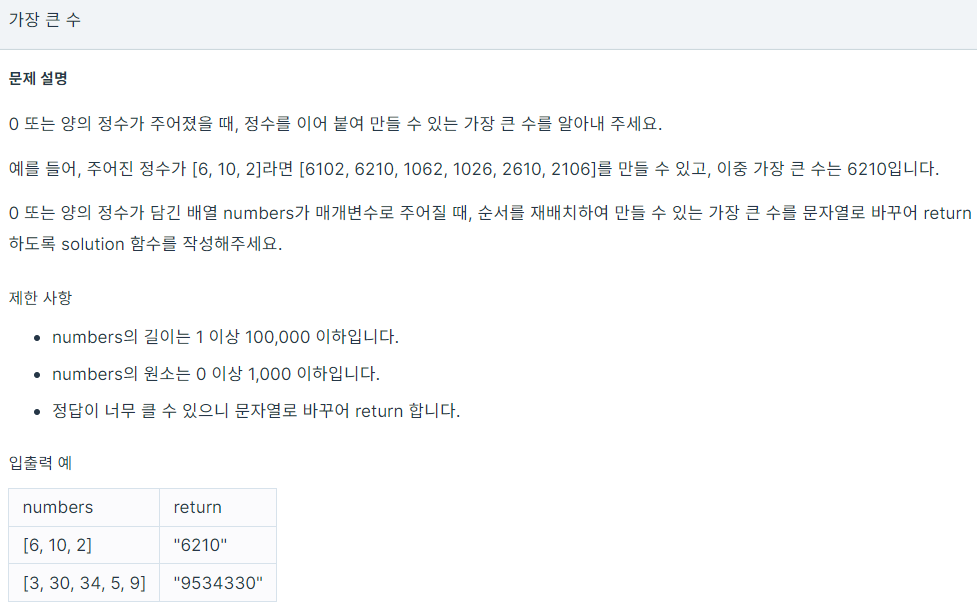

* #### 문제의 해결 방법
    1. 빈 문자열로 수를 초기화 한다.
    2. 가장 크게 만들 수 있는 수를 고른다.
    3. 그 수를 현재 수에 이어 붙인다.
    4. 모든 수를 다 사용할 때까지 반복한다.  
    * 이 방식은 0(n*n)의 시간이 걸린다
    <br>

    * 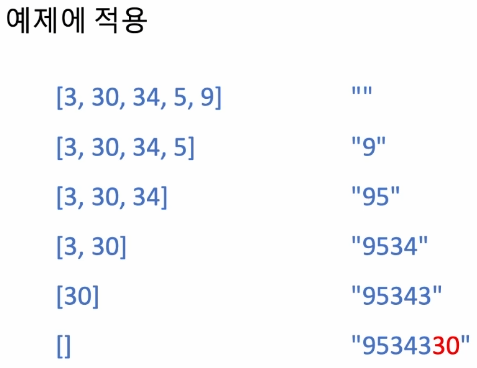
    

* #### 조금 나은 문제의 해결 방법
    1. 빈 문자열로 수를 초기화한다.
    2. 수의 목록을 <span style="color:yellow">(크게 만드는 것 우선으로)</span> 정렬한다.
    3. 목록에서 하나씩 꺼내어 현재 수에 이어 붙인다.
    4. 모든 수를 다 사용할 때까지 반복한다.
    * 이 방식은 O(nlogn)의 시간복잡도가 걸리므로 아까보다 효율적이다

* #### "크게 만드는 수"의 기준

* 3과 32를 비교했을때 3을 먼저 놓고 32를 뒤에놓는것이 더 크므로 이때는 3을 선택한다!
* 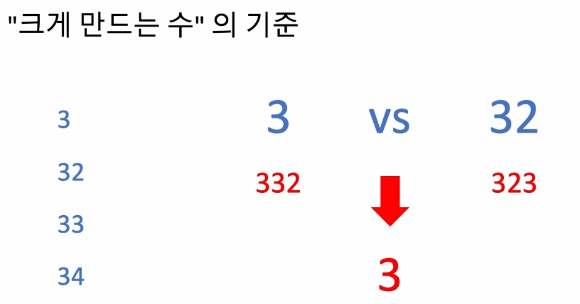

* 길이가 같은 수의 경우 단순히 큰 수를 선택하면 되지만 길이가 다른 수를 비교하는 경우 <span style="color:Aqua">문자의 길이는 최대 4이고 최소길이는 1이므로 (문제 제약조건) 따라서 최소문자라 가정하고 문자를 4번 곱한후 (문자열에서의 곱셈은 단순 4번 나열임!) 그리고 이 숫자에서 앞 4자리만 짤라 대소비교를 진행한다!</span> 

* 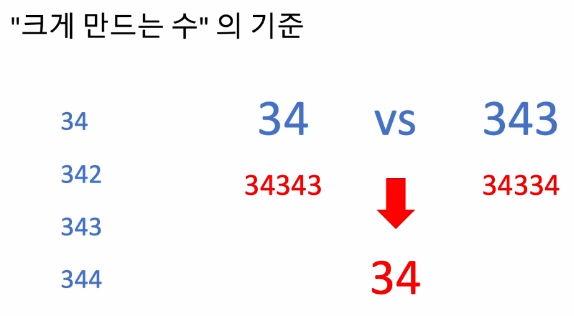

* #### 알고리즘 설계 -> 구현
    * 대소 관계 비교를 위한 기준을 마련
    * 이것을 이용하여 주어진 배열을 정렬
    * 정렬된 배열을 이용하여 문자열 표현을 완성

### Step 3-2: Python 풀이 예제 보기

* 이 코드는 numbers의 원소가 0 즉 원소가 0인 경우에 대해 풀이를 하지 못하는 맹점이 존재한다!


In [10]:
def solution(numbers):
    numbers = [str(x) for x in numbers]

    # 정렬할때 내가만든 함수로 정렬 하려고하면 람다 함수를 인자로 넣으면 된다
    # 문자의 길이는 최대 4이고 최소길이는 1이므로 (문제 제약조건) 따라서 최소문자라 가정하고 문자를 4번 곱한후
    # 문자열에서의 곱셈은 단순 4번 나열임! 그리고 이 숫자에서 앞 4자리만 짤라 대소비교를 진행한다
    # 문자열에서의 숫자의 정렬은 내림차순 정렬이 되므로 우린 큰 수를 먼저 오게 해야 하므로 reverse = True를
    # 통해 오름차순 정렬을 하도록 한다!
    
    numbers.sort(key = lambda x : (x * 4)[:4] ,reverse = True)

    answer = ''.join(numbers)

    return answer

In [11]:
# 0이 2개이상 존재하는 케에스의 경우에는 원래 값이 0이 나와야 하는대 0000이라고 잘 못 나오는 경우가 존재
# 이 trivial case를 고려하여 코드를 조금 수정해야한다!
solution([0,0,0,0])

'0000'

* 따라서 0인 경우도 만족 할 수 있도록 코드를 수정한다!

* #### 알고리즘의 복잡도

In [ ]:
def solution(numbers):
    # 복잡도는 O(n)
    numbers = [str(x) for x in numbers]

    # 복잡도는 O(nlogn)
    numbers.sort(key = lambda x : (x * 4)[:4] ,reverse = True)

    # 복잡도는 상수시간
    # 0만 2개이상 들어있는 케이스도 고려한 코드이다!
    if numbers[0] == '0':
        answer = '0'
    else:
        # 복잡도는 O(n)
        answer = ''.join(numbers)

    return answer
# 총 복잡도는 O(nlogn)이다!

### Step 4-1: 탐욕법(Greedy) 대표 문제 풀이: 큰 수 만들기

https://school.programmers.co.kr/learn/courses/30/lessons/42883

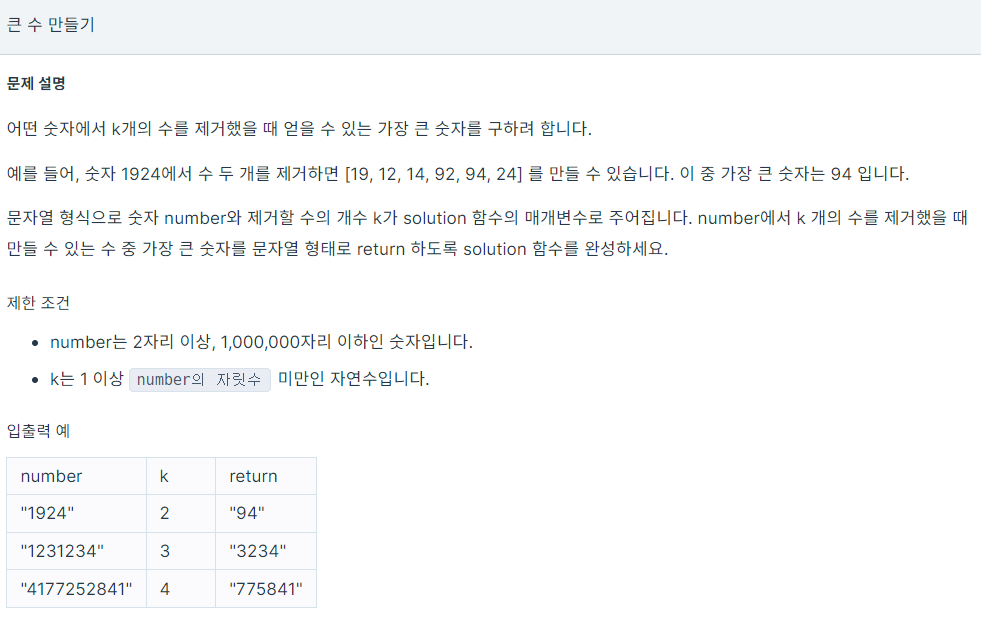

* #### 큰 수 만들기 - 원칙
    * 앞 자리에 큰 수가 오는 것이 전체를 크게 만든다
        * -> 따라서, 큰 것을 우선해서 골라 담고 싶다


* #### 예제 살펴보기


* 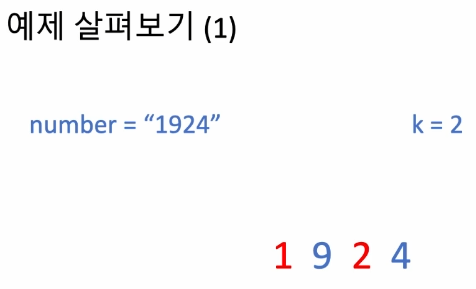

* 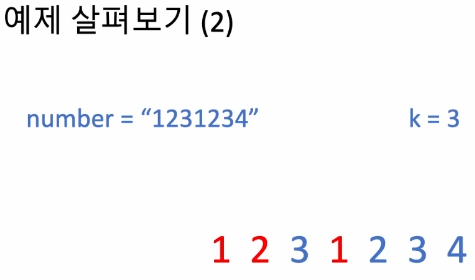

* 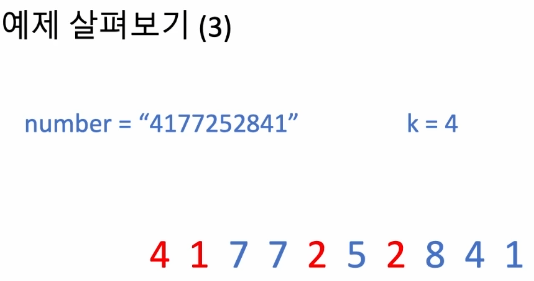

* 작은 것을 빼지만 맨 뒤의 1을 빼지 않는다 -> 앞에서 뺴는게 우리에게 이득이 되는것이다. 뺼 수 있는 수의 갯수가 정해져 있으므로 앞자리의 큰걸 두기위해 앞자리의 작은수들을 빼내고 775841을 남긴다

* #### 큰 수 만들기 - 방법
    * 앞 자리에서 부터 하나씩 골라서 담되,
    * <span style="color:Aqua">지금 담으려는 것 보다 작은 것들을 도로 뺀다! 단, 뺄 수 있는 수요에 도달 할 때 까지만</span>

    즉

* 큰 수가 앞 자리에, 작은 수가 뒷 자리에 놓이도록 <span style="color:Aqua">(제약조건) 뺄 수 있는 수의 개수</span>

* #### 알고리즘 설계 -> 구현
    * 주어진 숫자(Number)로 부터 하나씩 꺼내어 모으되
        * 이 때, 이미 모아둔 것 중 지금 등장한 것보다 작은 것들은 빼낸다.
        * <span style="color:red">이것은 어디서 어떻게 살펴보아야?</span>  
        <br>
    * 이렇게 모은 숫자들을 자릿수 맞추어 반환한다.
        * 아직 뺼 개수(K)를 채우지 못한 경우
        * <span style="color:red">자릿수는 어떻게 계산하는가?</span>

* #### 알고리즘의 복잡도
    * 가장 단순(무식)한 방법은 어떤 것일까?
    
    -> 가능한 모든 조합을 나열하고 그중에 제일 큰 것을 고르는 것!

    * 그렇다면 방금 설계한 알고리즘의 복잡도는?
    
        - O(n)의 복잡도를 가진다

* #### 탐욕법(Greedy Approach)
    * 앞 단계에서의 선택 (앞 자리에 큰 수!) 이 이후 단계에서의 
    
    * 동작에 의한 해 (solution)의 최적성에 영향을 주지 않음

### Step 4-2: Python 풀이 예제 보기

In [5]:
def solution(number, k):

    # 숫자를 하나하나씩 모으는대 이용할 리스트 정의
    collected = []
    for i, num in enumerate(number):

        # k > 0 => 아직까지 뺴낼 것이 남아 있으면
        # 마지막 글자가 현재 꺼낼 글자보다 작은 경우 => collected[-1] < num
        # 마지막 글자를 지칭하기 위해서는 collected 리스트에 원소가 하나라도 있어야 하므로 len(collected) > 0 
        # 조건 추가
        # 문자로 이루어진 숫자이지만 대소관계 비교는 숫자에서 비교하는 것과 동일하게 성립하므로 해당 코드처럼
        # 적어도 비교가 가능하다
        while len(collected) > 0 and collected[-1] < num and k > 0:
            collected.pop()
            k -= 1
        if k == 0:
            collected += list(number[i:])
            break
        collected.append(num)
    
    # 아직 까지 뺴낼 글자가 남아 있는 경우만 해당 코드 적용
    # 만약 숫자가 "7777: 위의 while문에서 조건을 만족하지 않으므로 collected에 [7,7,7,7] 이렇게만 되어서 for문을 빠져 나오게 될 것이다. 이런경우
    # 모두 숫자가 같기 때문에 강제로 뒤에서 k개 숫자만큼 숫자를 제거해 줘야한다. 이러한 trivial case를 고려한 것이 해당 코드이다.
    collected = collected[:-k] if k > 0 else collected
    answer = ''.join(collected)

    return answer




In [9]:
collected = ['1']
number = ["1",'234','45','777']
print(list(number[2:]))
print()
collected += list(number[2:])
print(collected)

['45', '777']

['1', '45', '777']


In [6]:
solution("1924",2)

['9', '4']


'94'